In [45]:
!git clone https://github.com/Zheng-Chong/CatVTON.git


Cloning into 'CatVTON'...
remote: Enumerating objects: 1315, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1315 (delta 36), reused 52 (delta 29), pack-reused 1250 (from 1)
Receiving objects: 100% (1315/1315), 16.72 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (430/430), done.


In [46]:
%cd CatVTON

/content/CatVTON/CatVTON


In [47]:
!pip install -r requirements.txt

In [48]:
!pip install datasets

from datasets import load_dataset

# Load the DeepFashion dataset
ds = load_dataset("lirus18/deepfashion", split='train')

# Display dataset information
print(ds)

Dataset({
    features: ['image', 'openpose', 'cloth', 'caption'],
    num_rows: 13679
})


In [49]:
import os
from PIL import Image
import torch
from torchvision import transforms

Model Image:


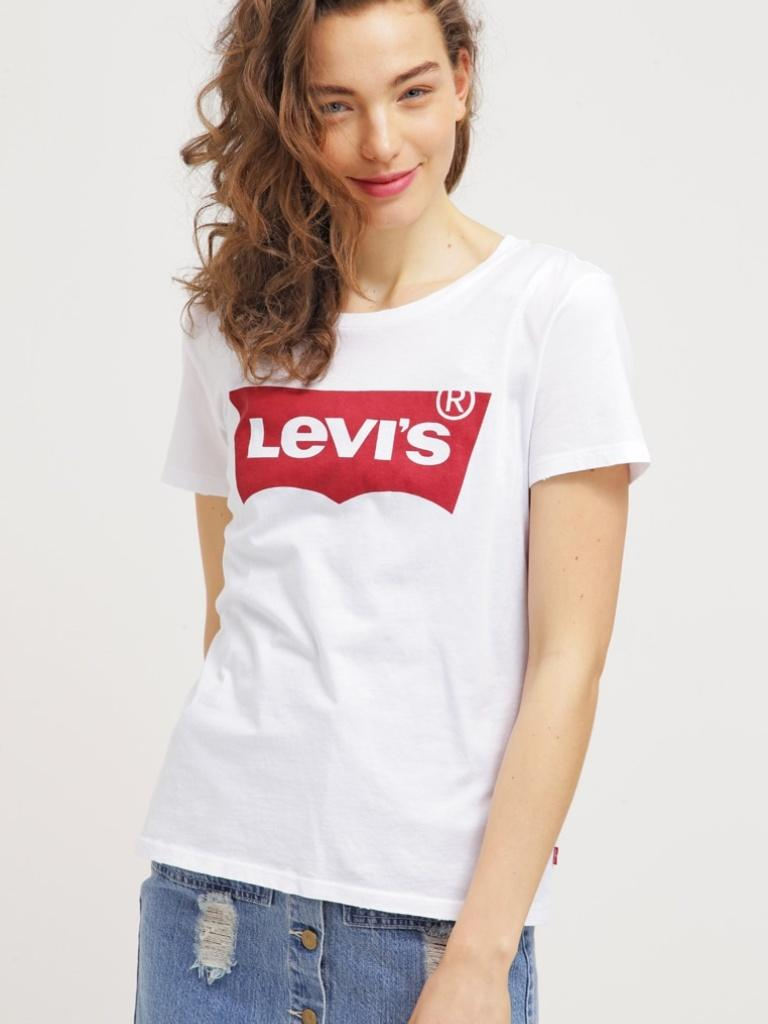

Clothing Image:


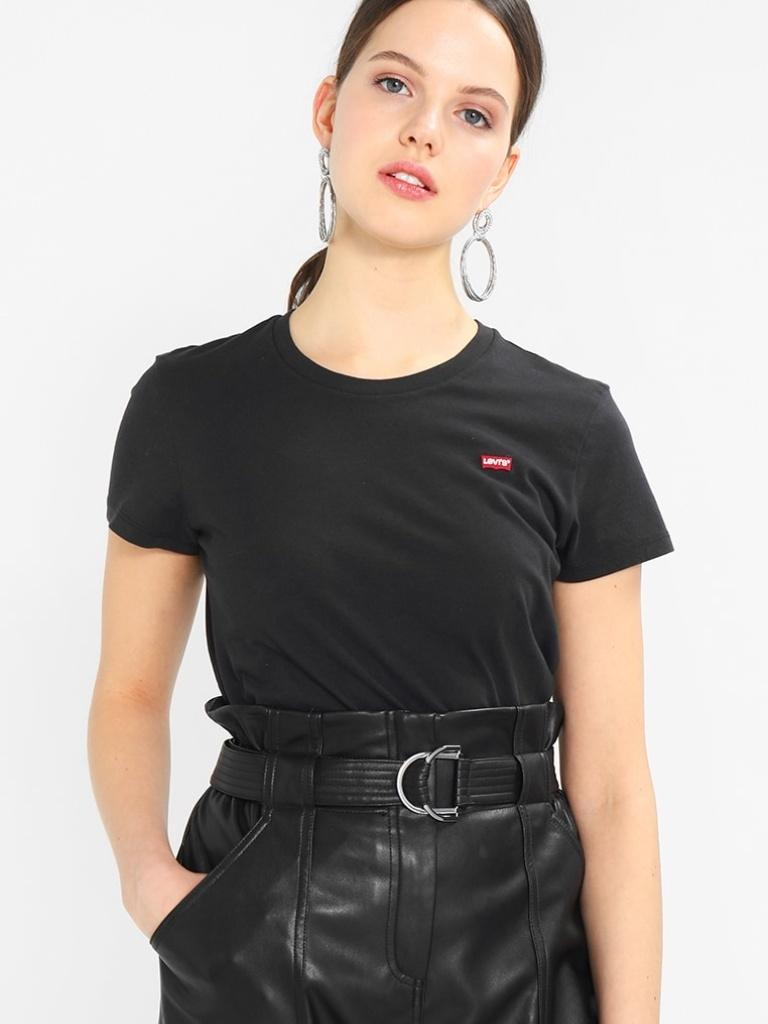

In [50]:
# Save sample images for model and clothing
ds[0]['image'].save("model_sample.jpg")
ds[1]['image'].save("clothing_sample.jpg")

# Verify the saved images
from IPython.display import Image as IPImage, display

print("Model Image:")
display(IPImage("model_sample.jpg"))

print("Clothing Image:")
display(IPImage("clothing_sample.jpg"))

In [51]:
#Preprocess the Images

In [52]:
from PIL import Image
import torchvision.transforms as transforms

In [53]:
# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [54]:
# Preprocess model and clothing images
model_image = Image.open("model_sample.jpg").convert("RGB")
clothing_image = Image.open("clothing_sample.jpg").convert("RGB")

model_input = transform(model_image).unsqueeze(0)
clothing_input = transform(clothing_image).unsqueeze(0)


In [55]:
!ls

app_p2p.py	     detectron2    LICENSE			__pycache__	  utils.py
app.py		     eval.py	   model			README.md
clothing_sample.jpg  index.html    model_sample.jpg		requirements.txt
densepose	     inference.py  preprocess_agnostic_mask.py	resource


In [56]:
!cat /content/CatVTON/model/pipeline.py


import inspect
import os
from typing import Union

import PIL
import numpy as np
import torch
import tqdm
from accelerate import load_checkpoint_in_model
from diffusers import AutoencoderKL, DDIMScheduler, UNet2DConditionModel
from diffusers.pipelines.stable_diffusion.safety_checker import \
    StableDiffusionSafetyChecker
from diffusers.utils.torch_utils import randn_tensor
from huggingface_hub import snapshot_download
from transformers import CLIPImageProcessor

from model.attn_processor import SkipAttnProcessor
from model.utils import get_trainable_module, init_adapter
from utils import (compute_vae_encodings, numpy_to_pil, prepare_image,
                   prepare_mask_image, resize_and_crop, resize_and_padding)


class CatVTONPipeline:
    def __init__(
        self, 
        base_ckpt, 
        attn_ckpt, 
        attn_ckpt_version="mix",
        weight_dtype=torch.float32,
        device='cuda',
        compile=False,
        skip_safety_check=False,
        use_tf32=True,
    

In [57]:
!grep -rnw '/content/drive/MyDrive/Pallav-Task_MKS_Digitech_LLP/CatVTON' -e 'CatVTON'


grep: /content/drive/MyDrive/Pallav-Task_MKS_Digitech_LLP/CatVTON: No such file or directory


In [58]:
import sys
sys.path.append('/content/drive/MyDrive/Pallav-Task_MKS_Digitech_LLP/CatVTON/model')


In [59]:
!find /content -name "pipeline.py"

/content/CatVTON/model/pipeline.py
/content/CatVTON/CatVTON/model/pipeline.py


In [60]:
!grep -rnw '/content/CatVTON' -e 'class CatVTONPipeline'


/content/CatVTON/model/pipeline.py:23:class CatVTONPipeline:
/content/CatVTON/CatVTON/model/pipeline.py:23:class CatVTONPipeline:


In [61]:
import sys
sys.path.append('/content/CatVTON/model')


In [62]:
from pipeline import CatVTONPipeline

In [63]:
import os
base_ckpt_path = '/content/CatVTON/detectron2/base_model.pth'
attn_ckpt_path = '/content/CatVTON/detectron2/attn_model.pth'

# Check if the files exist
os.path.exists(base_ckpt_path), os.path.exists(attn_ckpt_path)


(False, False)

In [66]:
pipeline = CatVTONPipeline(base_ckpt_path,attn_ckpt_path)

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like /content/CatVTON/detectron2/base_model.pth is not the path to a directory containing a scheduler_config.json file.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

In [67]:
person_image = torch.randn(1, 3, 256, 192)
cloth_image = torch.randn(1, 3, 256, 192)

In [68]:

output = pipeline.run_inference(person_image, cloth_image)

NameError: name 'pipeline' is not defined

In [69]:
with torch.no_grad():
    output = pipeline(model_input, clothing_input)

# Convert output tensor to image
output_image = transforms.ToPILImage()(output.squeeze(0))
output_image.save("output.jpg")

NameError: name 'pipeline' is not defined

In [70]:
#Display Result

import matplotlib.pyplot as plt

In [71]:
# Display Input and Output Images
plt.figure(figsize=(12, 6))



<Figure size 1200x600 with 0 Axes>

In [72]:
# Model image
plt.subplot(1, 3, 1)
plt.title("Model Image")
plt.imshow(model_image)
plt.axis('off')

# Clothing image
plt.subplot(1, 3, 2)
plt.title("Clothing Image")
plt.imshow(clothing_image)
plt.axis('off')

(-0.5, 767.5, 1023.5, -0.5)

In [73]:
# Try-on output
plt.subplot(1, 3, 3)
plt.title("Try-On Output")
plt.imshow(output_image)
plt.axis('off')

plt.show()

NameError: name 'output_image' is not defined

In [74]:
from google.colab import files

# Download the generated output image
files.download("output.jpg")

FileNotFoundError: Cannot find file: output.jpg